## Summer days

The datafile contains the number of summer days (> 25 C) measured in de Bilt in the Netherlands.


Demonstration: 
1. Linear Model
2. Parameter fit, using a poisson likelihood
3. PowellFitter (from ScipyFitter)
4. Histogram of residuals is not a Poisson distribution

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import PolynomialModel

from BayesicFitting import AmoebaFitter
from BayesicFitting import PowellFitter
from BayesicFitting import PoissonErrorDistribution
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt



Read the data


In [2]:
tbl = ascii.read( "data/zomerdagen.csv" )
year = tbl['col1'].data
nsd = tbl['col2'].data


Define the model

In [3]:
mdl = PolynomialModel( 0 )
mdl.parameters = [0.5]            ## starting parameter; > 0
print( mdl )


Polynomial: f( x:p ) = p_0


define the fitter: Fitter

In [4]:
errdis = PoissonErrorDistribution( )
fitter = PowellFitter( year, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( nsd )

  

POWELL
   direc: array([[ 0.027]])
     fun: 507.6567325563951
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 2
  status: 0
 success: True
       x: array([ 20.262])


In [5]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )



Parameters :    20.262
StDevs     :    10.507
Scale      :   106.639
Evidence   :  -223.381


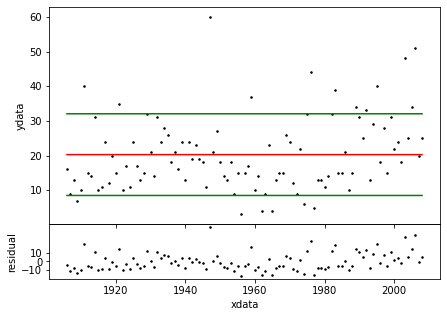

In [6]:
plotFit( year, nsd, model=mdl, fitter=fitter, residuals=True )


Exercise:
Assert for yourself that higher order polynomials do not fit any better that order 0.



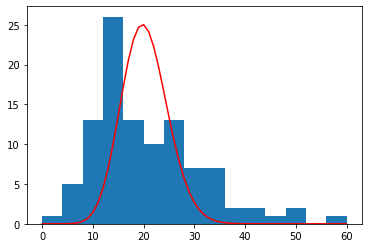

In [7]:
from BayesicFitting import logFactorial

x = numpy.linspace( 0, 60, 61, dtype=float )
plt.hist( nsd, 15, (0,60))
p = param[0]
y = numpy.exp( x * math.log( p ) - p - logFactorial( x ) )
y *= 25 / numpy.max( y )
plt.plot( x, y, 'r-' )
plt.show()


The figure above shows a histogram of the measurements, overplot with a poisson distribution with an average of 20.3. It shows that even though we could not find a better model, there is more to the data than a simple poisson draw from a constant average number of summer days.
